# Passenger Satisfaction 
* EDA
 * Characterisation of the data set
 * Descriptive Statistics
 * Outliers
* Handling with missing values
 * Imputing Missing Values
 
Logical justification based on the reasoning for the specific choice of machine learning approaches.

* Feature Engineering 
 * Encoding
 * Scaling 
 
* Trainig Data

Characterization of data, explanation and description of techniques used for the variation in the
accuracy across three training splits (5% / 10% / 15% / 20%) using cross validation techniques.

* Apply ML model 

Multiple machine learning approaches (at least two) using hyperparameters and a comparison between
the chosen modelling approaches

* Cross Validation

Cross-validation methods should be used to justify the authenticity of your ML results.

* Result 

Interpret and explain the results obtained, discuss overfitting / underfitting / generalisation, provide a
rationale for the chosen model and use visualisations to support your findings.

## EDA
###  Characterisation of the data set

In [14]:
#import required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math

#Import for missing values 
import missingno as msno

# Confusion Matrix
from sklearn.metrics import confusion_matrix

#Hyperparameters 
from sklearn.model_selection import GridSearchCV

#Standardization
from sklearn.preprocessing import StandardScaler

# Import train_test_split function
from sklearn.model_selection import train_test_split 

# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics  

#import models from scikit learn module:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#Cross validation
from sklearn.model_selection import cross_val_score

# Import this library to suppress the warnings
import warnings
warnings.filterwarnings("ignore")

In [15]:
df_airline= pd.read_csv("/content/airline_passenger_satisfaction.csv") ## Importing the dataset
df_airline.head() # looking at the dataset

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [16]:
df_airline.shape #Loking the shape of the dataset

(129880, 24)

In [17]:
df_airline.info() #get some information about our DataSet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

### Descriptive Statistics


In [18]:
df_airline.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


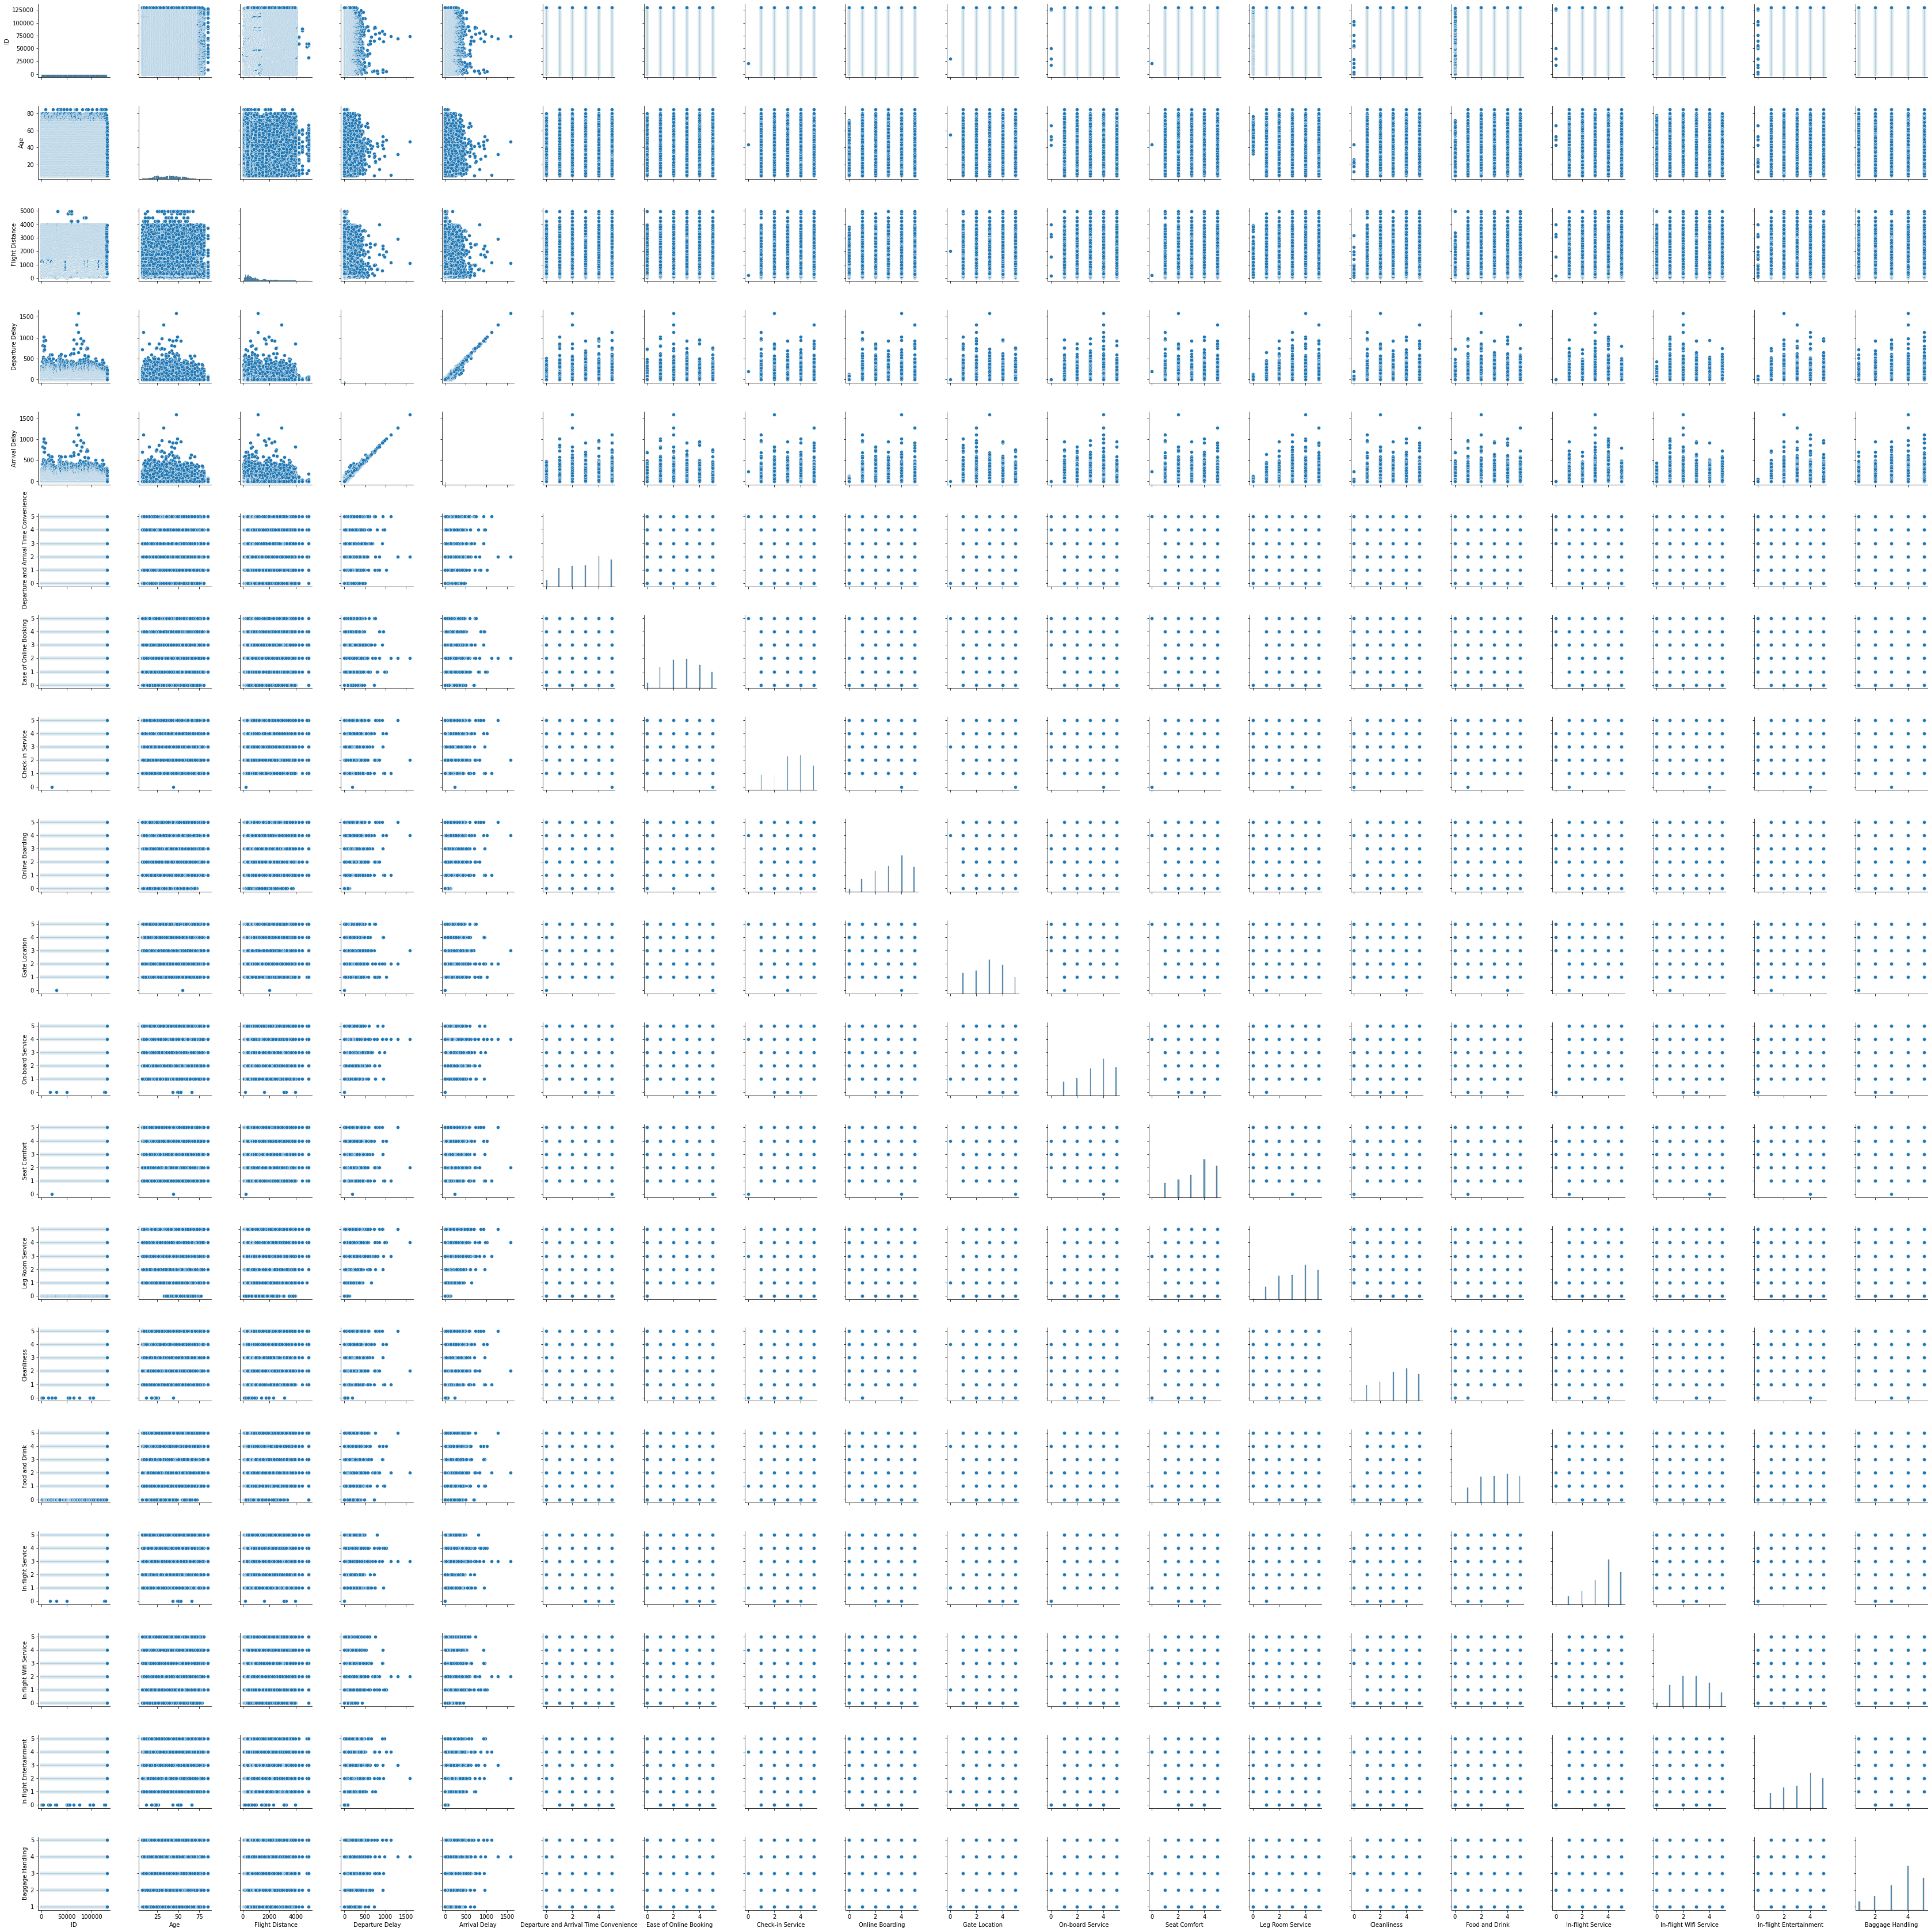

In [19]:
sns.pairplot(df_airline)

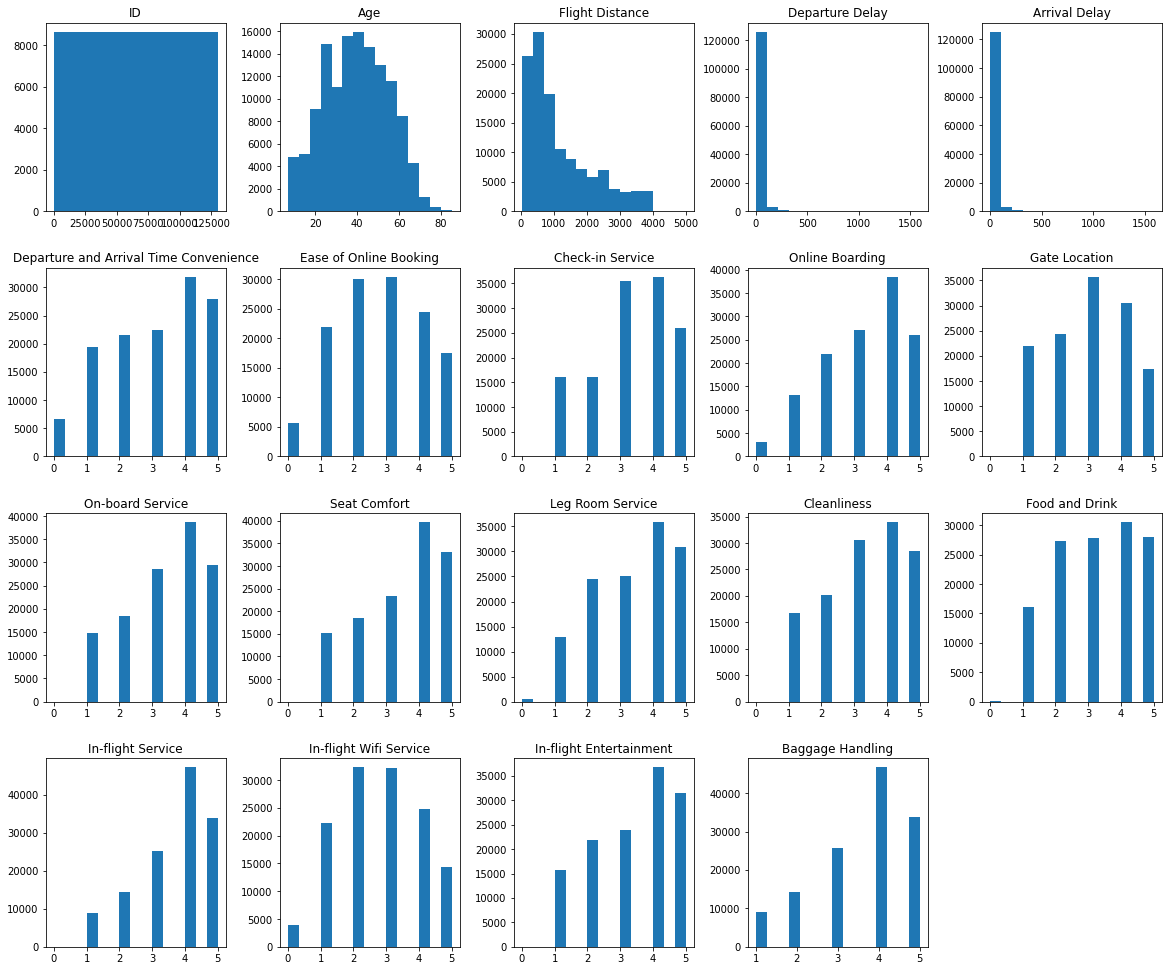

In [20]:
df_airline.hist(bins = 15 , layout = (4,5), figsize = (20,17)  ,column = df_airline.columns, grid = False)
plt.show()

In [21]:
df_airline.describe(include=object)

,Gender,Customer Type,Type of Travel,Class,Satisfaction
count,129880,129880,129880,129880,129880
unique,2,2,2,3,2
top,Female,Returning,Business,Business,Neutral or Dissatisfied
freq,65899,106100,89693,62160,73452


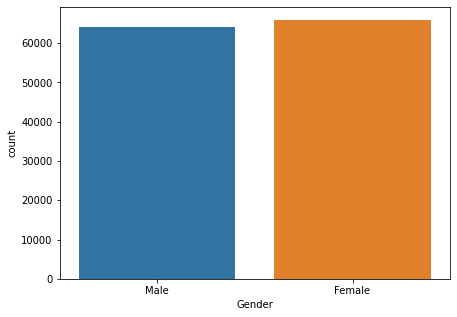

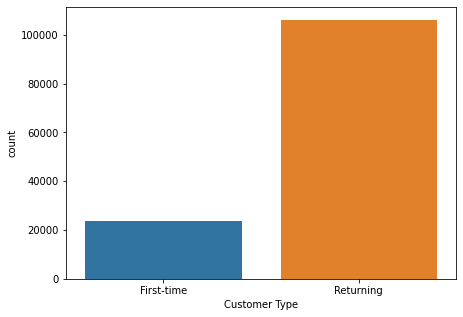

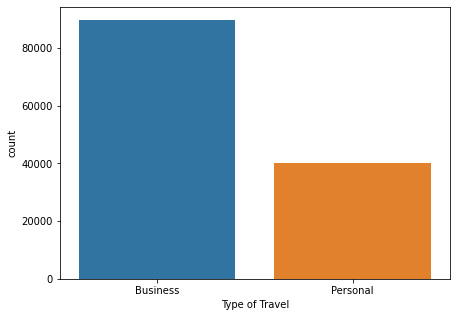

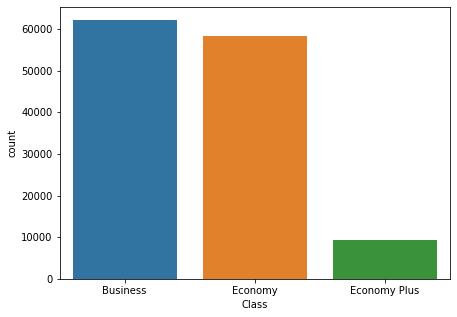

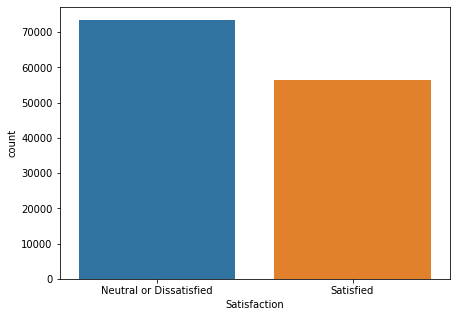

In [22]:
ColObj= ['Gender', 'Customer Type','Type of Travel','Class','Satisfaction'  ]
for col in ColObj:
    plt.figure(figsize=(7,5))
    sns.countplot(x=col,data=df_airline)
    plt.show()

In [23]:
df_airline.skew()

ID                                        0.000000
Age                                      -0.003606
Flight Distance                           1.108142
Departure Delay                           6.821980
Arrival Delay                             6.670125
Departure and Arrival Time Convenience   -0.332469
Ease of Online Booking                   -0.018779
Check-in Service                         -0.366569
Online Boarding                          -0.456911
Gate Location                            -0.058265
On-board Service                         -0.421320
Seat Comfort                             -0.485818
Leg Room Service                         -0.348414
Cleanliness                              -0.300926
Food and Drink                           -0.155063
In-flight Service                        -0.691580
In-flight Wifi Service                    0.040465
In-flight Entertainment                  -0.366385
Baggage Handling                         -0.677400
dtype: float64

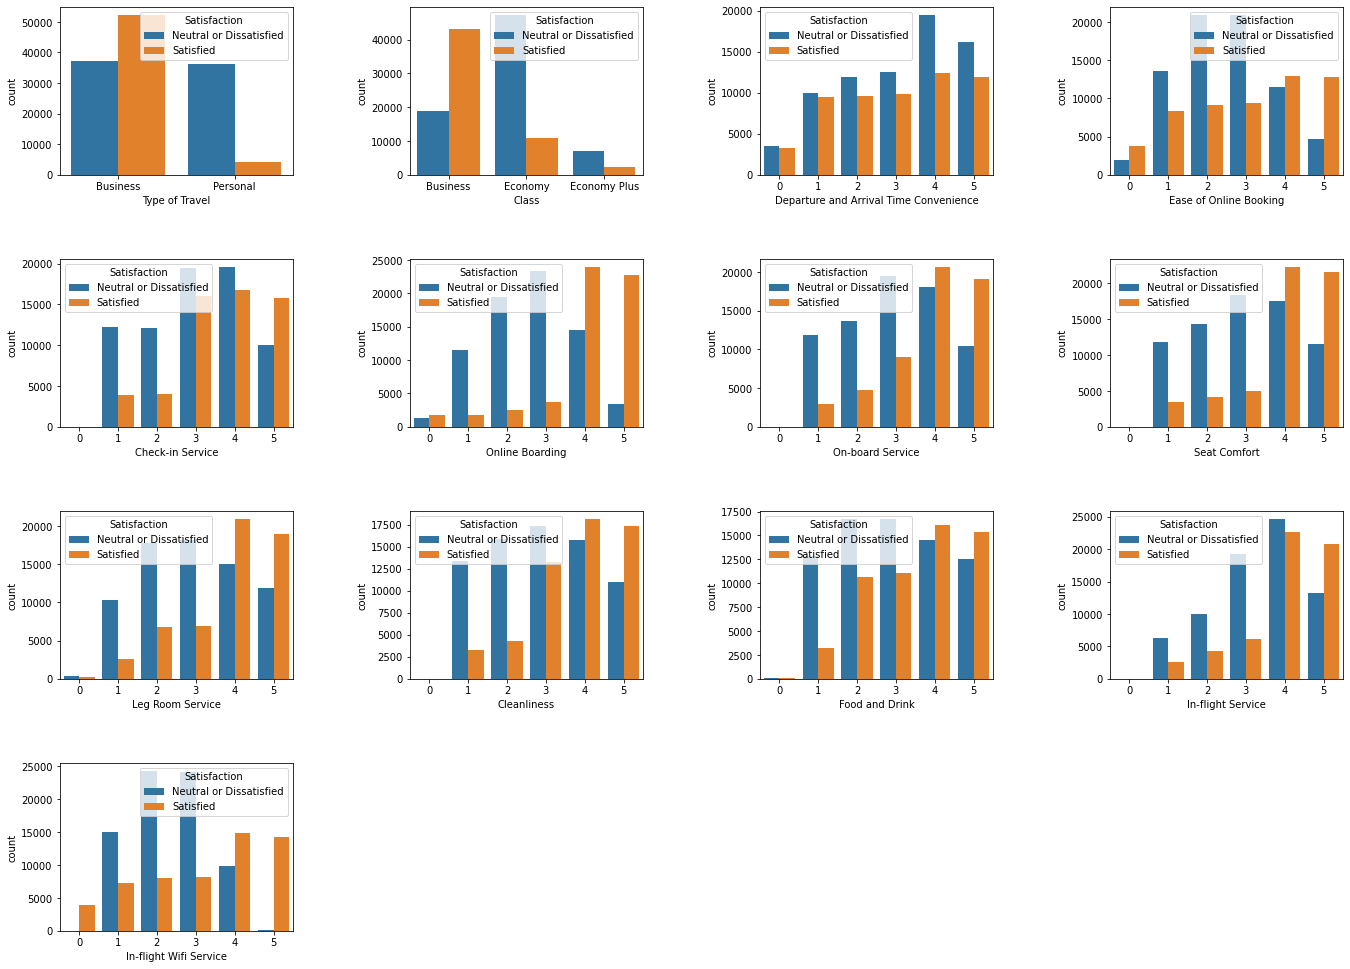

In [25]:
columns = ['Type of Travel', 'Class','Departure and Arrival Time Convenience',
      'Ease of Online Booking','Check-in Service', 'Online Boarding','On-board Service','Seat Comfort', 
      'Leg Room Service', 'Cleanliness','Food and Drink', 'In-flight Service', 'In-flight Wifi Service']
plt.figure(figsize=(23,17))

for col in range(len(columns)):
    plt.subplot(4,4,col+1)
    sns.countplot(x=df_airline[columns[col]],hue=df_airline['Satisfaction'])    
    plt.subplots_adjust(wspace = 0.5, hspace= 0.5)

### Outliers

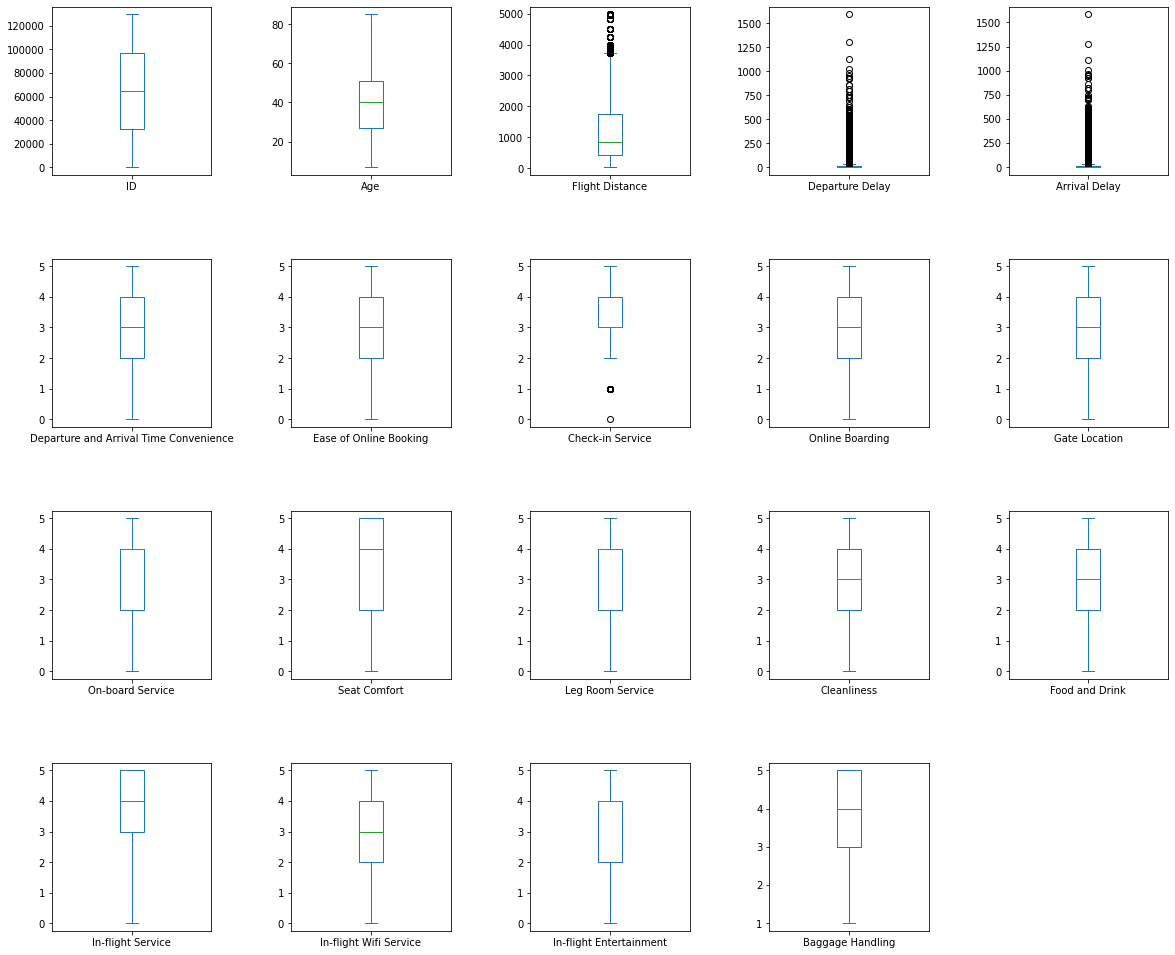

In [26]:
df_airline.plot(subplots =True, kind = 'box', layout = (4,5), figsize = (20,17))
plt.subplots_adjust(wspace = 0.5, hspace= 0.5)

heatmap for the correlaction

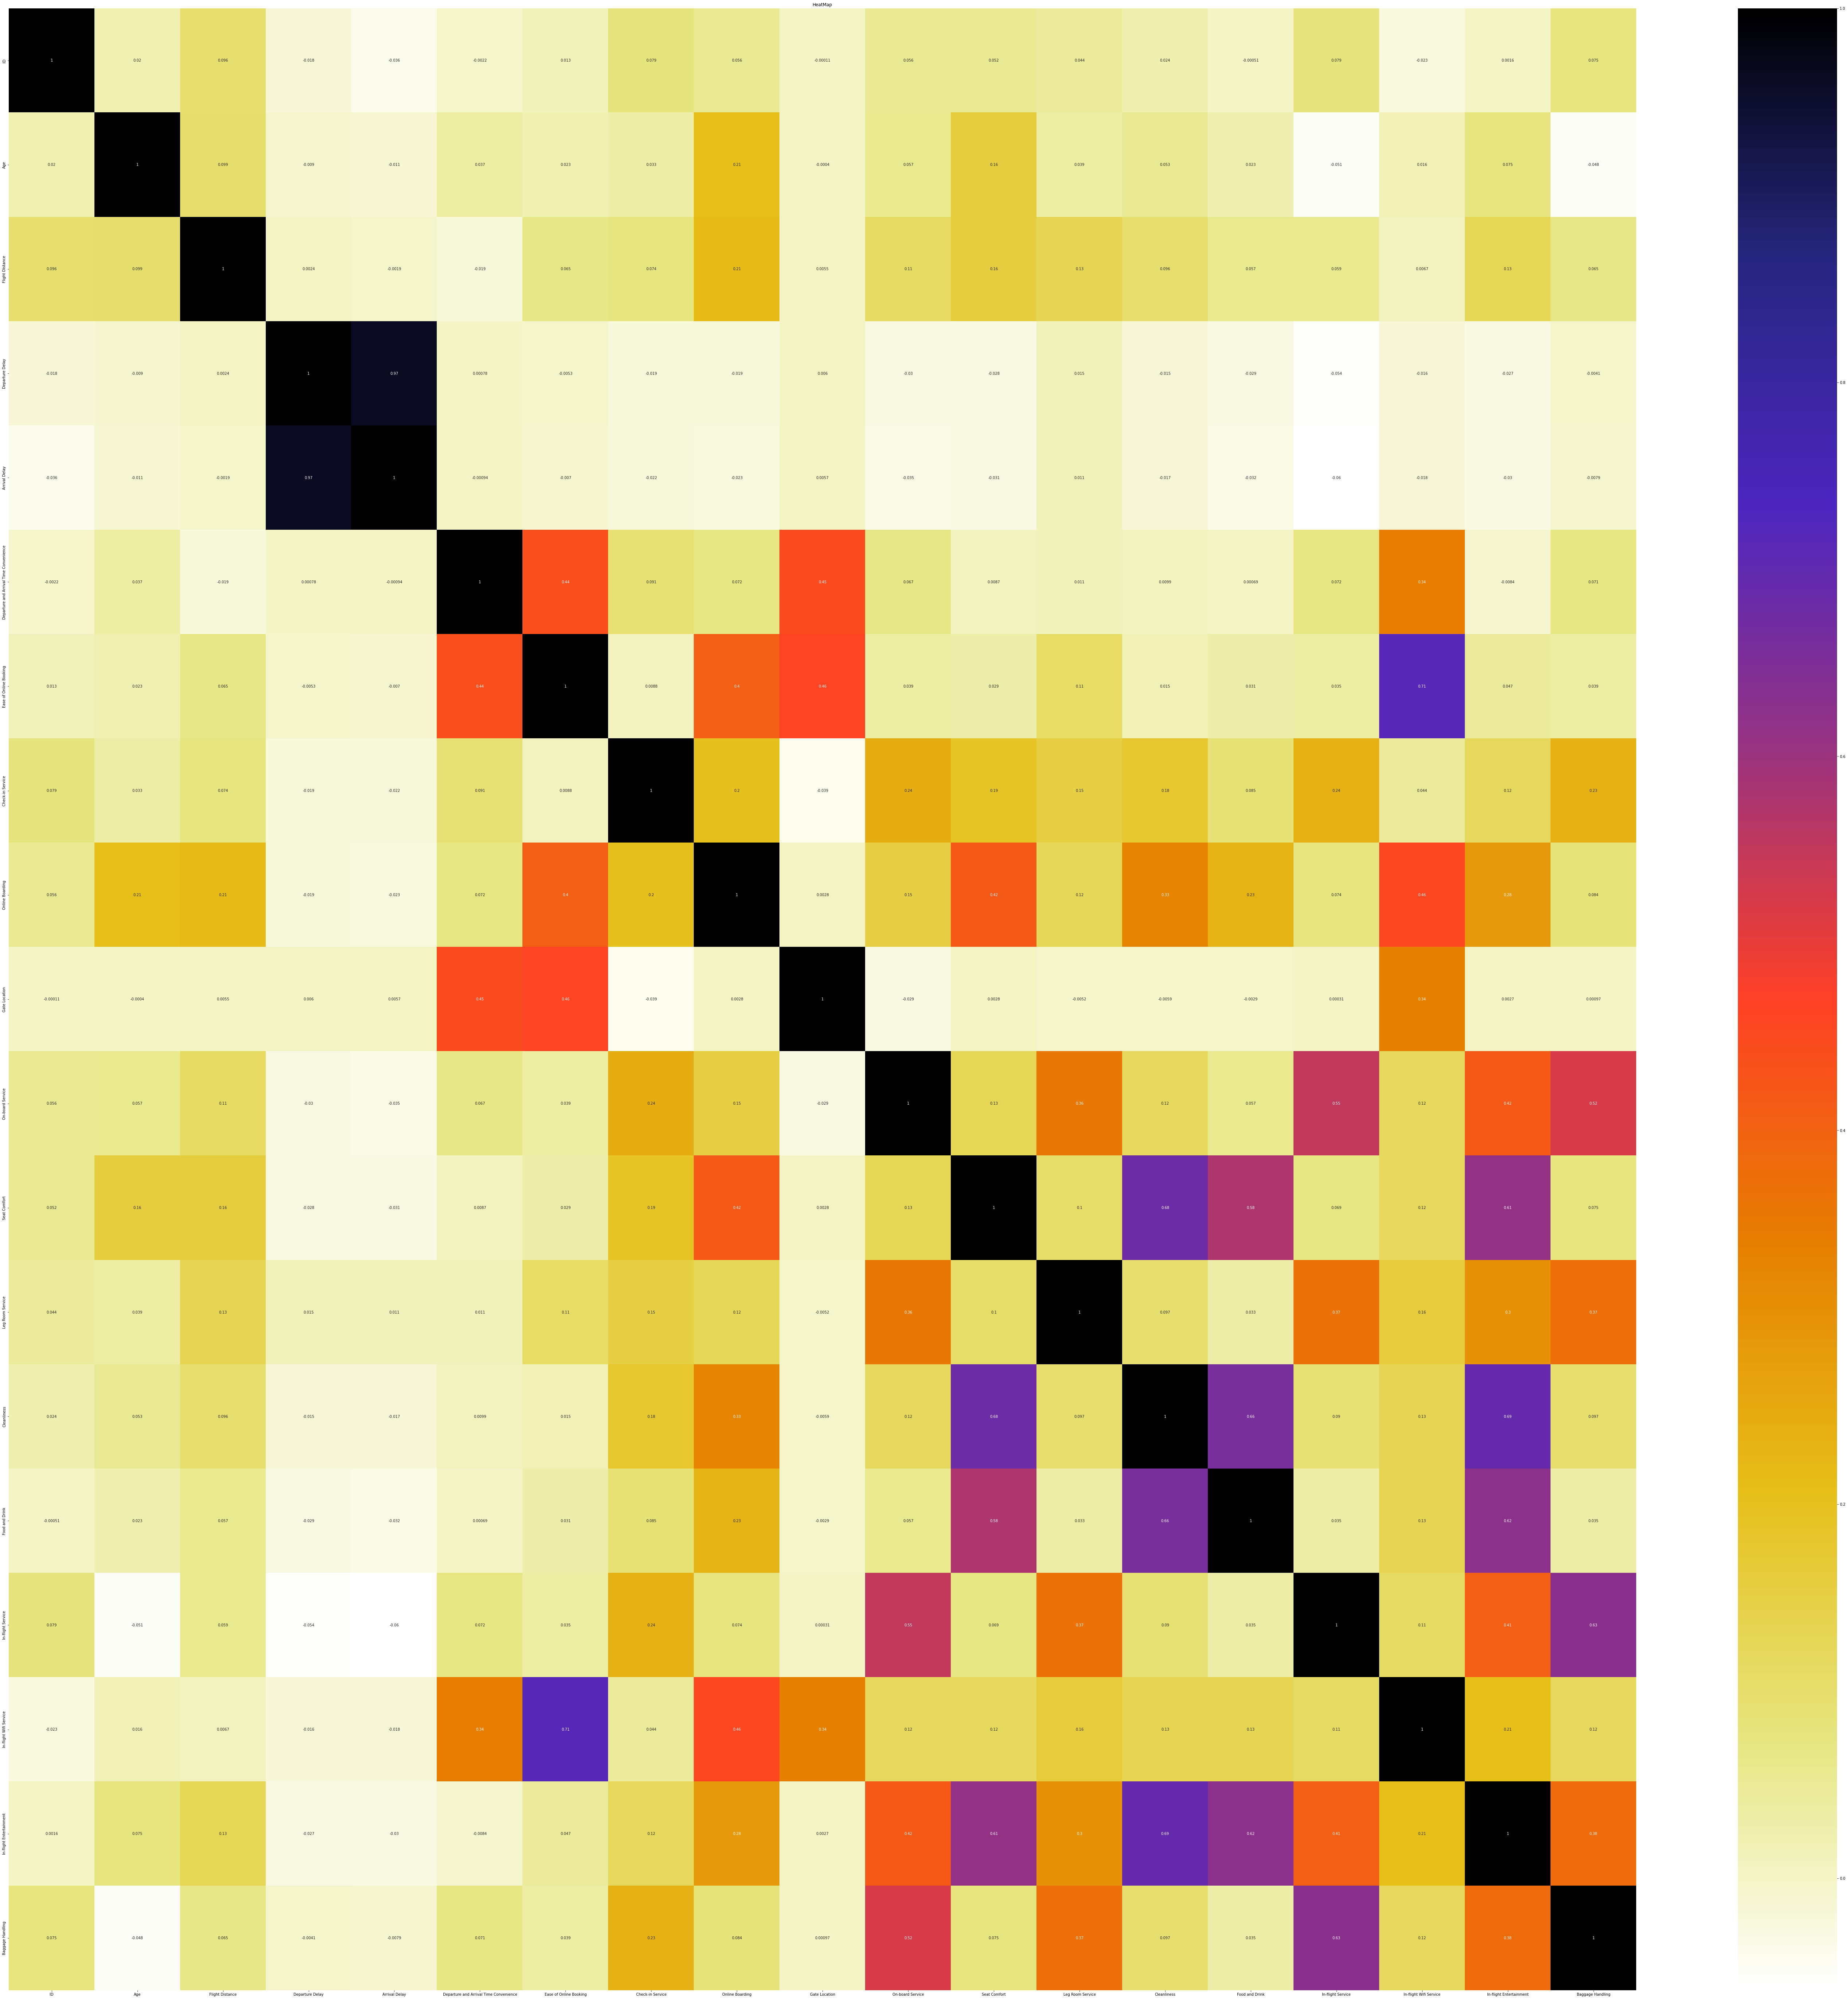

In [27]:
# shows the correlations between the values
plt.figure(figsize=(100,100))
cor= df_airline.corr() 
sns.heatmap( cor, annot = True, cmap = plt.cm.CMRmap_r,)
plt.title( "HeatMap" )
plt.show()

## Handling with missing values


In [28]:
df_airline.isnull().sum() #check how many values are missing (NaN)

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [ ]:
msno.bar(df_airline) #you can see the missing values 

we can see that the number of missing values is insignificant compared to the number of data contained in our dataset, we have decided to impute them with the median because it does not follow a normal distribution.

In [ ]:
df_airline['Arrival Delay'].fillna(df_airline['Arrival Delay'].median(),inplace=True)

In [ ]:
df_airline.isnull().sum()

## Feature Engineering

According to our scenario we want to know what are the factors that impact the dissatisfaction of medium distance flights on passengers, that is why we need to convert our numerical values to categorical values in order to classify the flights according to distance, for this we will rely on the aviation rules that classify them into short, medium and long distance. 

In [29]:
df_airline.groupby("Flight Distance")["Flight Distance"].count()

Flight Distance
31       11
56       11
67      160
73       77
74       42
       ... 
4243     23
4502     14
4817      6
4963     19
4983     16
Name: Flight Distance, Length: 3821, dtype: int64

we are use datafream.cut() to convert the column "distance of flights" from a continuous variable to a categorical variable, because we will see the impact of the variables on Median flights

In [30]:
#bins=[-math.inf,800,2200,math.inf]
#distance=["Short","Medium", "Long"]
#df_airline["Flight Distance"]= pd.cut(df_airline["Flight Distance"],bins,labels=distance)

We will focus on short-haul flights. A short distance trip is known to have a distance of less than or equal to 800 nautical miles.

In [31]:
df_airline=df_airline[df_airline["Flight Distance"]<800]

In [32]:
len (df_airline)

62517

In [ ]:
df_airline.head(10)

In [ ]:
#sns.countplot(x = 'Flight Distance', hue = 'Satisfaction', data = df_airline)
#plt.show()

In [33]:
#print(df_airline['Class'].unique())

### Dropping columns 


In [34]:
df_airline=df_airline.drop(['ID',"Gender","Age"],axis=1)

In [35]:
df_airline

,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
11,First-time,Business,Business,421,20,21.0,2,2,1,2,...,2,2,5,1,1,3,1,1,4,Neutral or Dissatisfied
12,First-time,Business,Economy,453,16,30.0,2,2,2,2,...,2,5,4,5,5,4,2,5,4,Neutral or Dissatisfied
30,First-time,Business,Business,212,0,0.0,2,2,5,2,...,4,2,5,2,2,4,2,2,5,Neutral or Dissatisfied
31,First-time,Business,Economy,173,0,0.0,0,4,3,4,...,5,3,5,3,3,4,4,3,4,Satisfied
32,First-time,Business,Business,173,22,28.0,2,2,5,2,...,3,2,3,2,2,5,2,2,5,Neutral or Dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Returning,Personal,Economy Plus,447,2,3.0,4,4,4,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,Returning,Personal,Economy Plus,308,0,0.0,5,3,5,3,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,Returning,Personal,Economy Plus,337,6,14.0,5,2,4,2,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,Returning,Personal,Economy Plus,337,31,22.0,4,4,3,4,...,4,4,5,3,3,4,5,3,5,Satisfied


###  Encoding

Encoding class label





In [36]:
class_mapping = {label: idx for idx, label in 
                 enumerate(np.unique(df_airline['Satisfaction']))}

In [37]:
df_airline['Satisfaction'] = df_airline['Satisfaction'].map(class_mapping)


### Mapping Ordinal Variables

Mapping "Customer Type" variable as




First-time :0
Returning: 1

In [38]:
Cust_Type_mapp={'First-time': 0, "Returning":1}

df_airline["Customer Type"]=df_airline["Customer Type"].map(Cust_Type_mapp)

Cust_Type_mapp

{'First-time': 0, 'Returning': 1}

Mapping "Type of Travel" variable as 


Business: 0,  
Personal: 1

In [39]:
Type_travel_mapp={'Business': 0,  "Personal":1}

df_airline["Type of Travel"]=df_airline["Type of Travel"].map(Type_travel_mapp)

Mapping "Class" variable as 


Business: 0,  
Economy: 1,

Economy Plus: 2

In [40]:
Class_mapp={'Business': 0,  "Economy":1, "Economy Plus":2}

df_airline["Class"]=df_airline["Class"].map(Class_mapp)

In [41]:
print(df_airline['Class'].unique())

[0 1 2]


In [42]:
df_airline

,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
11,0,0,0,421,20,21.0,2,2,1,2,...,2,2,5,1,1,3,1,1,4,0
12,0,0,1,453,16,30.0,2,2,2,2,...,2,5,4,5,5,4,2,5,4,0
30,0,0,0,212,0,0.0,2,2,5,2,...,4,2,5,2,2,4,2,2,5,0
31,0,0,1,173,0,0.0,0,4,3,4,...,5,3,5,3,3,4,4,3,4,1
32,0,0,0,173,22,28.0,2,2,5,2,...,3,2,3,2,2,5,2,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,1,2,447,2,3.0,4,4,4,4,...,5,1,4,4,4,5,4,4,4,0
129876,1,1,2,308,0,0.0,5,3,5,3,...,5,2,5,2,2,4,3,2,5,0
129877,1,1,2,337,6,14.0,5,2,4,2,...,3,3,4,3,3,4,2,3,5,0
129878,1,1,2,337,31,22.0,4,4,3,4,...,4,4,5,3,3,4,5,3,5,1


In [43]:
from scipy import sparse

In [44]:
sparse.issparse(df_airline) # how sparse is the dataser

False

In [45]:
#print(df_airline['Class'].unique())

Separate X and Y from df_airline

In [46]:

X= df_airline.iloc[:, 0:20].values

In [47]:
X

array([[0., 0., 0., ..., 1., 1., 4.],
       [0., 0., 1., ..., 2., 5., 4.],
       [0., 0., 0., ..., 2., 2., 5.],
       ...,
       [1., 1., 2., ..., 2., 3., 5.],
       [1., 1., 2., ..., 5., 3., 5.],
       [1., 1., 2., ..., 3., 2., 1.]])

In [48]:
y= df_airline.iloc[:,20:21 ].values
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

Perform the actual data splitting  for X 70% for training and 30 % testing

                                     Y 70% for training and 30% testing

### Splitting the Data-Set 

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 0,
                                                    stratify = y)

In [50]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((43761, 20), (18756, 20), (43761, 1), (18756, 1))

### Scaling

Minimun - Maximum  Normalization

In [51]:
#from sklearn.preprocessing import MinMaxScaler
#mms = MinMaxScaler()

#X_train_norma= mms.fit_transform(X_train)
#X_test_norma = mms.transform(X_test)

Normalizing our data between 0 and 1

In [52]:
#X_train_norma

In [53]:
#X_test_norma

In [54]:
#pd.DataFrame(X_train_norma).describe()

# Standardization


We normalize in order to have a symmetric distribution in our data set.
The intention here is to transform the data so that it is normally distributed

In [55]:
from sklearn.preprocessing import StandardScaler

std_sc = StandardScaler()
X_train_std = std_sc.fit_transform(X_train)
X_test_std = std_sc.transform(X_test)

In [56]:
#pd.DataFrame(X_train_std).describe()

In [57]:
#pd.DataFrame(X_train_norma).describe()

## Modeling 

We will classify with 4 models and evaluate mean accuracy of each of them by stratified cross validation :

* DecisionTreeClassifier
* RandomForestClassifier
* LogisticRegression
* KNeighborsClassifier

### Hyperparameters 


In [58]:
random_state=50
classifier = [DecisionTreeClassifier(random_state=random_state),
             RandomForestClassifier(random_state=random_state),
             LogisticRegression(random_state=random_state),
             KNeighborsClassifier()]
dt_param_grid={"min_samples_split":range(10,500,20),
              "max_depth":range(1,20,2)}
rf_param_grid={"max_features":[1,3,10],
              "min_samples_split":[2,3,10],
              "min_samples_leaf":[1,3,10],
              "bootstrap":[False],
              "n_estimators":[20,50,100,300],
              "criterion":["gini","entropy"]}

logreg_param_grid={"C":np.logspace(-3,3,7),
                  "penalty":["l1","l2"]}
knn_param_grid={"n_neighbors": np.linspace(1,19,10,dtype=int).tolist(),
               "weights":["uniform","distance"],
               "metric":["euclidean","manhattan"]}
classifier_param=[dt_param_grid,
                 rf_param_grid,
                 logreg_param_grid,
                 knn_param_grid]

NameError: ignored

In [ ]:
cv_result=[]
best_estimators=[]
for i in range(len(classifier)):
    clf=GridSearchCV(classifier[i],param_grid=classifier_param[i],cv=StratifiedKFold(n_splits=10),scoring="accuracy",n_jobs=-1,verbose=1)
    clf.fit(x_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

In [ ]:
cv_results = pd.DataFrame({"Cross Validation Means":[0.9487092632956902,0.9600554398927423,0.8716034750829321,0.9304536646758501], "ML Models":["DecisionTreeClassifier","RandomForestClassifier",
             "LogisticRegression",
             "KNeighborsClassifier"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

In [ ]:
#parameters={"criterion": ("gini","entropy"),
            #"n_estimators": (10, 20, 30,50,100),
            #"max_samples": (1/3,2/3)}

#Grid= GridSearchCV (forest,
                    #parameters,
                    #scoring="accuracy")
#Grid.fit(df_airline[df_airline.columns[:-1]].values,df_airline["Satisfaction"].values)

In [ ]:
#sorted(Grid.cv_results_.keys())

In [ ]:
#Grid.cv_results_["params"]

In [ ]:
#rint(Grid.cv_results_["rank_test_score"])
#print(Grid.cv_results_["rank_test_score"])
#print(Grid.cv_results_["mean_test_score"])
#print(Grid.best_score_)
#print(Grid.best_params_)

## PCA


In [ ]:
pass_no_label=df_airline.drop("Satisfaction",axis=1)
pass_no_label


In [ ]:

from sklearn.decomposition import PCA
pca = PCA().fit(pass_no_label) 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel("number of components") 
plt.ylabel("cumulative explained variance"); 

In [ ]:

pca = PCA(2)
projected = pca.fit_transform(pass_no_label)
projected.shape

In [ ]:
pass_no_label = pd.DataFrame(projected, columns =['B1', 'B2'])
pass_no_label

In [ ]:
df_airline["Satisfaction"] = df_airline["Satisfaction"]
df_airline

In [ ]:
air_array=df_airline.values

X = air_array[:,0:2]
y = air_array[:,2]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [ ]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [ ]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_result = cross_val_score (model, X_train, Y_train, cv=kfold, scoring= "accuracy")
	results.append(cv_result)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_result.mean(), cv_result.std()))

In [ ]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [ ]:
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [ ]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))

## Apply ML model
### Build a Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=500, random_state=1)

forest.fit(X_train, y_train)

In [ ]:
feat_labels = df_airline.columns[1:]
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
# plt.savefig('figures/04_10.png', dpi=300)
plt.show()

### Select the top 5 Features

In [ ]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of features that meet this threshold criterion:', 
      X_selected.shape[1])

In [ ]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))